In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings

sns.set()
warnings.filterwarnings('ignore')


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Cleaning data.csv')
df

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,1.0,4745.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              20467 non-null  object 
 1   founded_at          20467 non-null  float64
 2   investment_rounds   20467 non-null  float64
 3   first_funding_at    20467 non-null  float64
 4   last_funding_at     20467 non-null  float64
 5   funding_rounds      20467 non-null  float64
 6   funding_total_usd   20467 non-null  float64
 7   first_milestone_at  20467 non-null  float64
 8   last_milestone_at   20467 non-null  float64
 9   milestones          20467 non-null  float64
 10  relationships       20467 non-null  float64
 11  lat                 20467 non-null  float64
 12  lng                 20467 non-null  float64
 13  analytics           20467 non-null  bool   
 14  biotech             20467 non-null  bool   
 15  cleantech           20467 non-null  bool   
 16  ecom

In [4]:
columns_target = df.select_dtypes(['float64','object'])
columns_target.columns

Index(['status', 'founded_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'isClosed', 'Age_in_Days',
       'Age_in_Days.1'],
      dtype='object')

In [5]:
#Making Independent Features
train_features = columns_target.columns.tolist()
del train_features[13]
train_features

['status',
 'founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days',
 'Age_in_Days.1']

In [6]:
#Eliminating 'status' as it relates to 'isClosed'
del train_features[0]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days',
 'Age_in_Days.1']

In [7]:
#Eliminating 'Age_in_Days.1' as it is just the replication of 'Age_in_Days'
del train_features[13]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [8]:
#Eliminating 'founded_at' as it relates to 'Age_in_Days'
del train_features[0]
train_features

['investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [9]:
X = df[train_features]
y = df['isClosed']

In [10]:
#Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X , y = smote.fit_resample(X,y)

In [11]:
y.value_counts()


isClosed
1.0    17553
0.0    17553
Name: count, dtype: int64

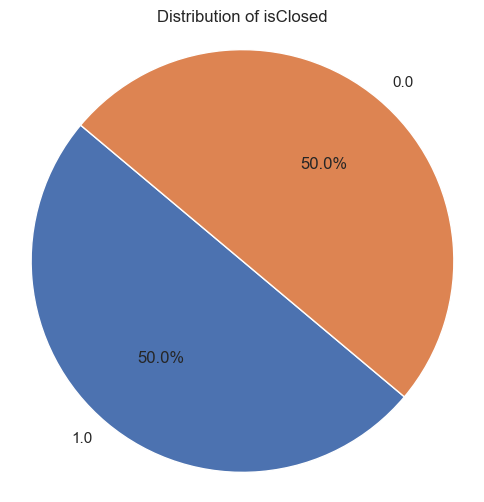

In [12]:
closed_counts = y.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(closed_counts, labels=closed_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of isClosed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
X.head(10)

,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,Age_in_Days
0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,17.00000,47.606209,-122.332071,6935.0
1,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,14.00000,37.386052,-122.083851,0.0
2,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,14.00000,37.774929,-122.419415,6205.0
3,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,6.00000,30.267153,-97.743061,7665.0
4,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,19.00000,37.774929,-122.419415,6570.0
5,9.010471,2003.0,2003.0,1.0,250000.0,2007.000000,2007.000000,1.000000,2.00000,-27.469771,153.025124,7665.0
6,9.010471,2011.0,2011.0,1.0,100000.0,2010.000000,2010.000000,1.000000,6.14057,38.559376,-67.025344,5110.0
7,9.010471,2011.0,2012.0,2.0,11300000.0,2010.164879,2011.046642,1.703825,2.00000,42.018989,-71.007822,6570.0
8,9.010471,2007.0,2007.0,2.0,414840.0,2010.164879,2011.046642,1.703825,2.00000,48.856614,2.352222,6570.0
9,9.010471,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,1.000000,8.00000,47.610150,-122.201516,7300.0


In [14]:


# Assuming you have your data loaded into X (features) and y (labels/target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





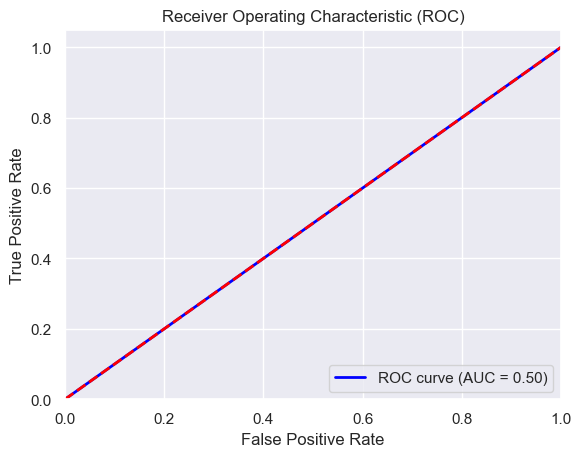

In [15]:
# Instantiate the XGBoost classifier with default parameters
model = XGBClassifier()

# Train the model on the resampled training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [16]:
# Choose threshold to maximize F1-score
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Convert probabilities to binary predictions based on the optimal threshold
y_pred_class = [1 if prob >= optimal_threshold else 0 for prob in y_pred_proba]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0


In [17]:
# Oversampling again
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [18]:
y_train_resampled.value_counts()


isClosed
0.0    14042
1.0    14042
Name: count, dtype: int64

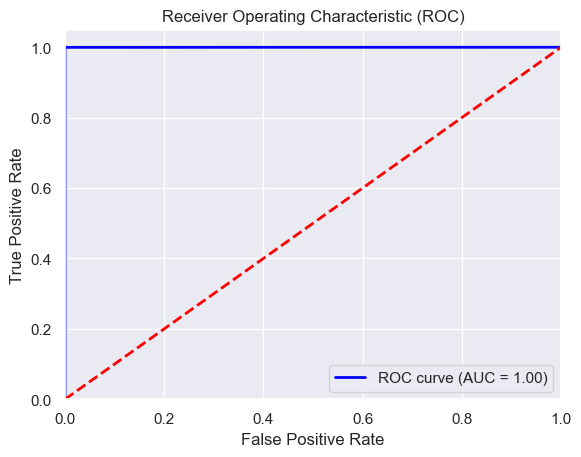

Accuracy: 0.9998575904300769
Precision: 1.0
Recall: 0.9997151808601538
F1-score: 0.9998575701467027


In [19]:
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Choose threshold to maximize F1-score
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Convert probabilities to binary predictions based on the optimal threshold
y_pred_class = [1 if prob >= optimal_threshold else 0 for prob in y_pred_proba]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)